In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('loan_approval_dataset.csv')

In [49]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [50]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [52]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [53]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [54]:
df['moveable_assets']=df[' bank_asset_value']+df[' luxury_assets_value']
df[' immovable_assets']=df[' commercial_assets_value']+df[' residential_assets_value']

In [55]:

df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loan_id            4269 non-null   int64 
 1    no_of_dependents  4269 non-null   int64 
 2    education         4269 non-null   object
 3    self_employed     4269 non-null   object
 4    income_annum      4269 non-null   int64 
 5    loan_amount       4269 non-null   int64 
 6    loan_term         4269 non-null   int64 
 7    cibil_score       4269 non-null   int64 
 8    loan_status       4269 non-null   object
 9   moveable_assets    4269 non-null   int64 
 10   immovable_assets  4269 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 367.0+ KB


In [57]:
df.shape

(4269, 11)

In [58]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' loan_status', 'moveable_assets', ' immovable_assets'],
      dtype='object')

In [59]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,moveable_assets,immovable_assets
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [60]:
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [61]:
df.drop(columns='loan_id',inplace=True)

<Axes: >

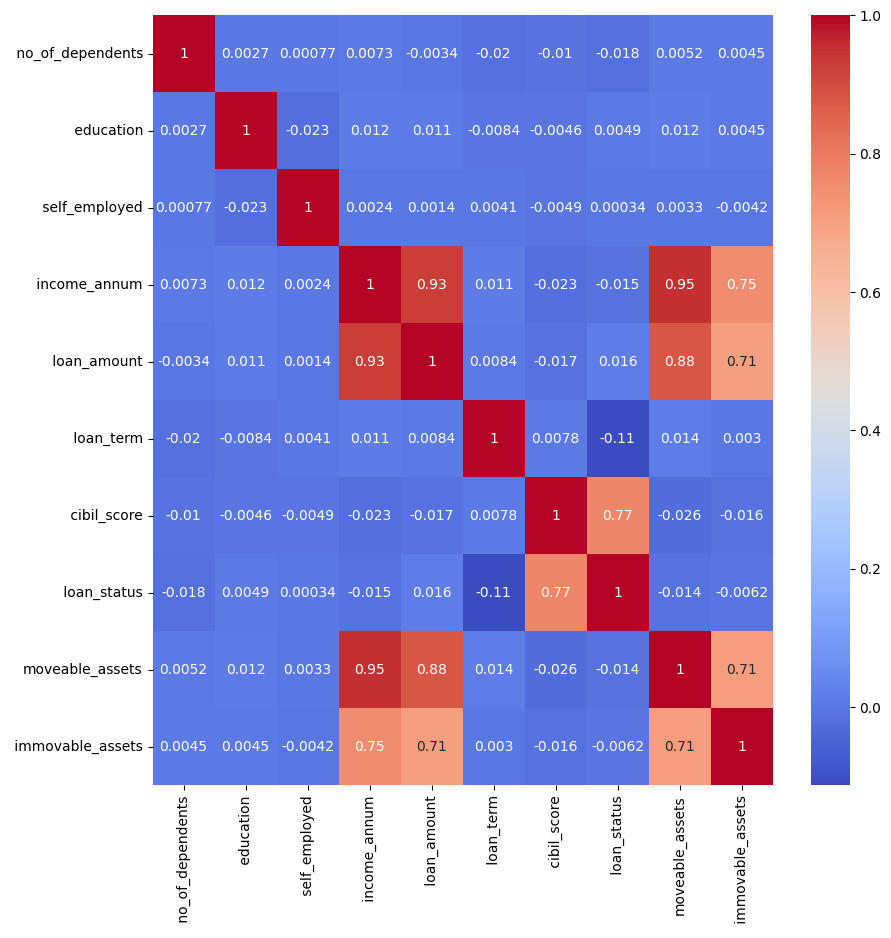

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

<Axes: xlabel=' cibil_score', ylabel='Count'>

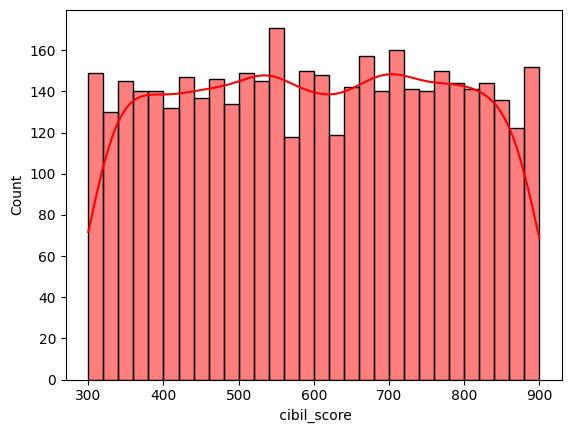

In [63]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

<Axes: xlabel=' loan_status', ylabel='count'>

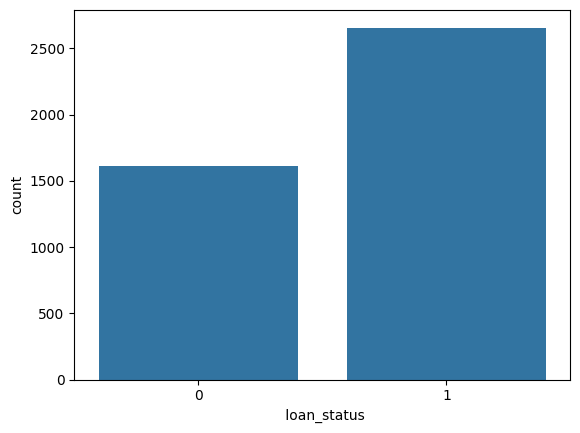

In [64]:
sns.countplot(x=df[' loan_status'] ,data=df)

In [65]:
num = df.select_dtypes(exclude='object').columns

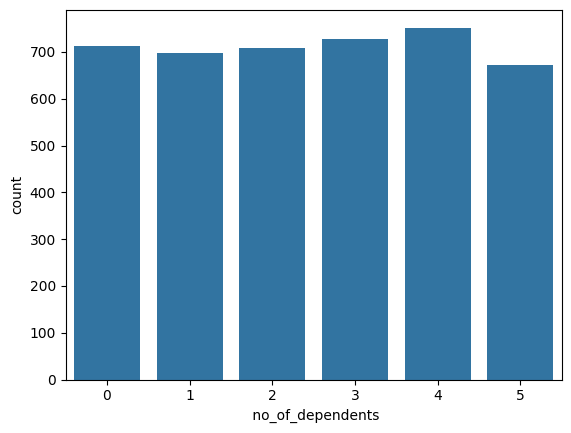

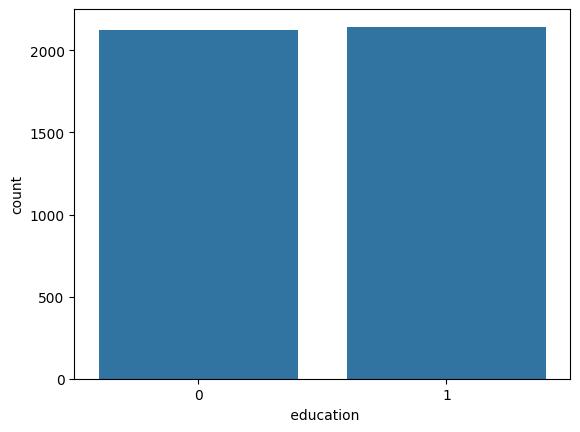

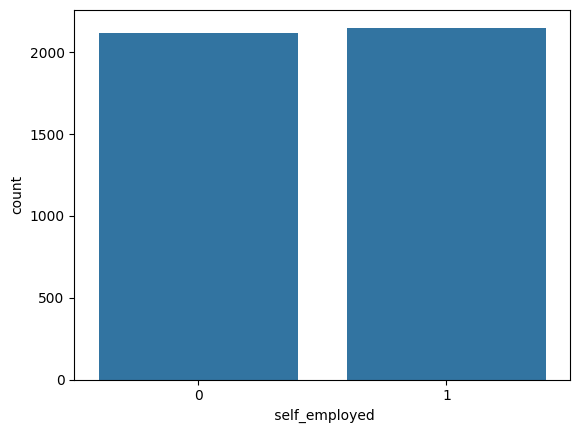

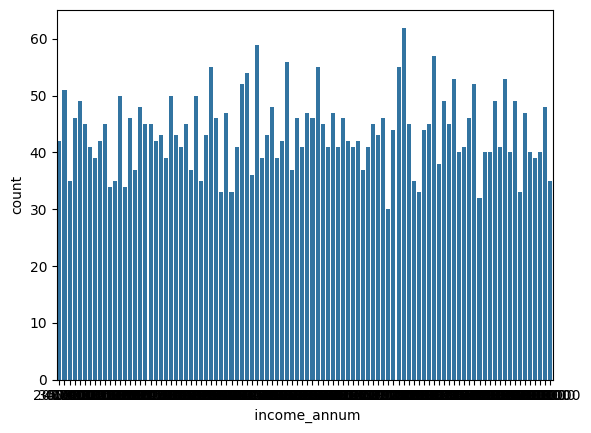

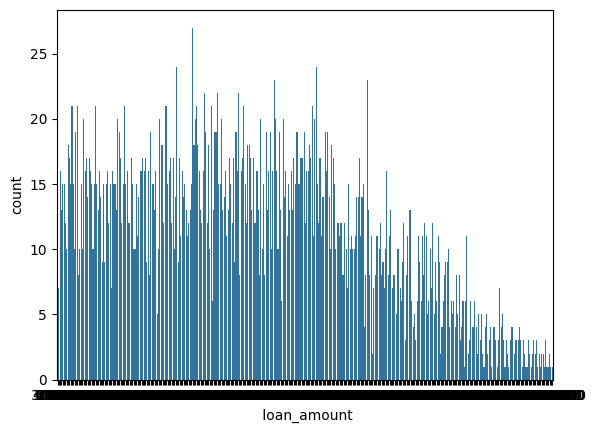

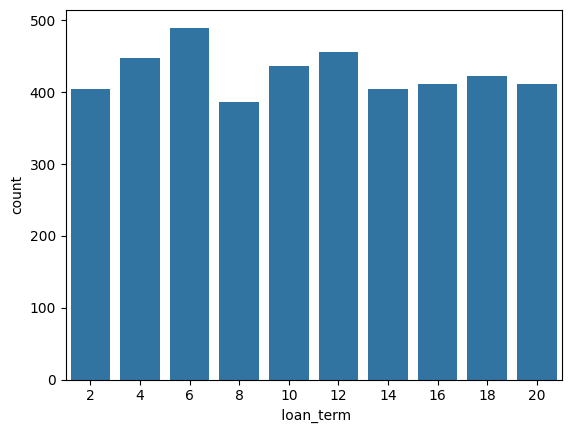

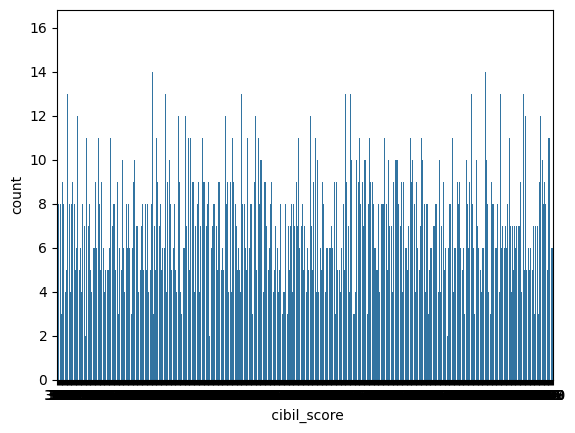

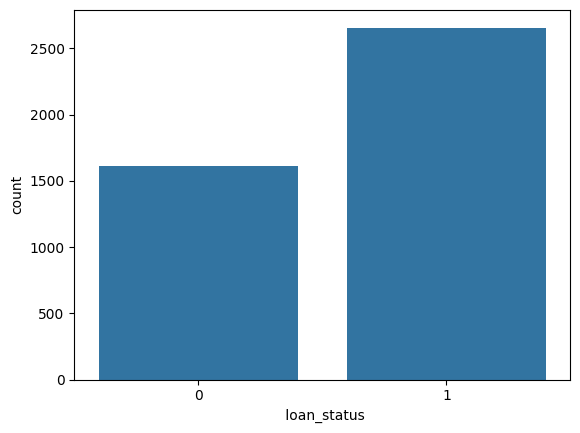

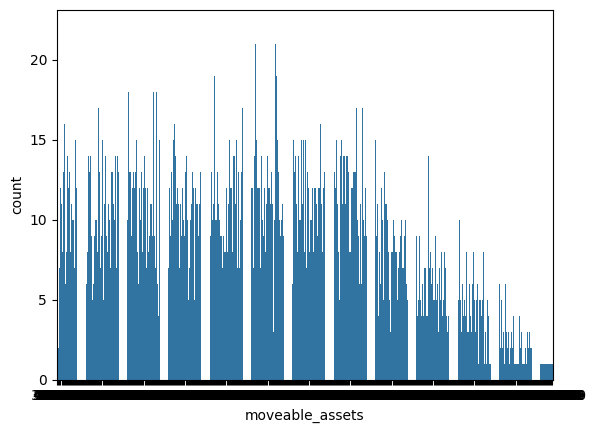

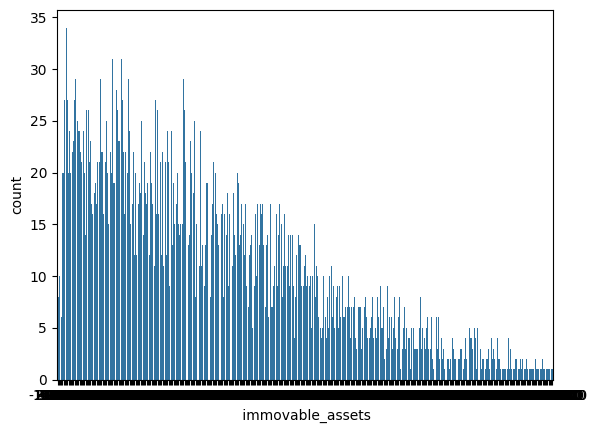

In [66]:
for i in num:
    sns.countplot(x=df[i])
    plt.show()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0    no_of_dependents  4269 non-null   int64
 1    education         4269 non-null   int64
 2    self_employed     4269 non-null   int64
 3    income_annum      4269 non-null   int64
 4    loan_amount       4269 non-null   int64
 5    loan_term         4269 non-null   int64
 6    cibil_score       4269 non-null   int64
 7    loan_status       4269 non-null   int64
 8   moveable_assets    4269 non-null   int64
 9    immovable_assets  4269 non-null   int64
dtypes: int64(10)
memory usage: 333.6 KB


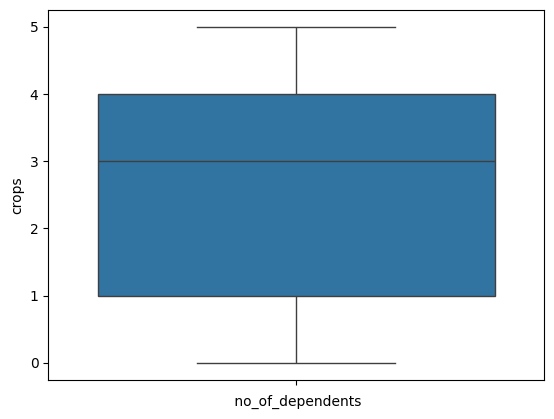

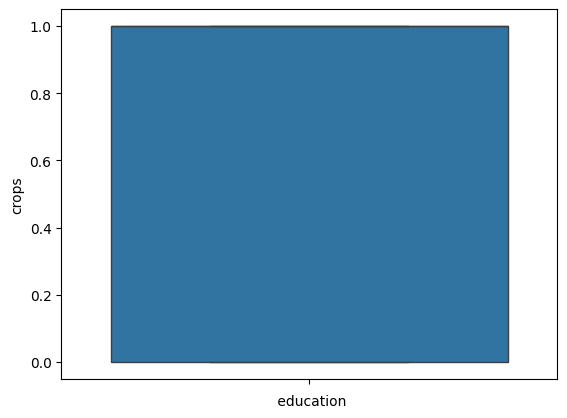

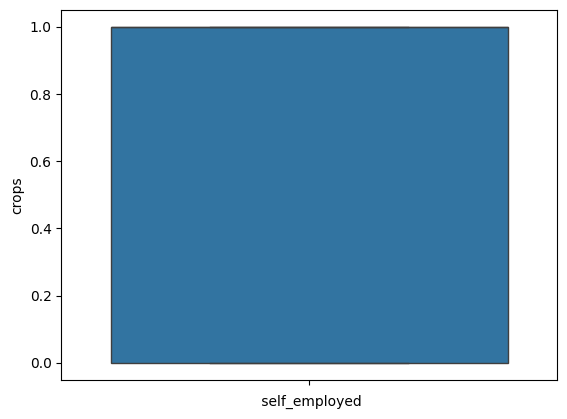

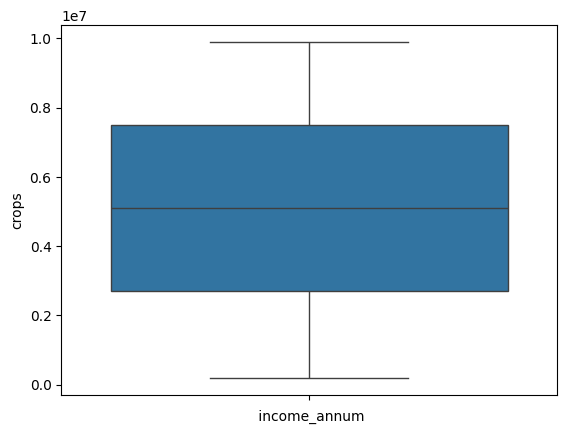

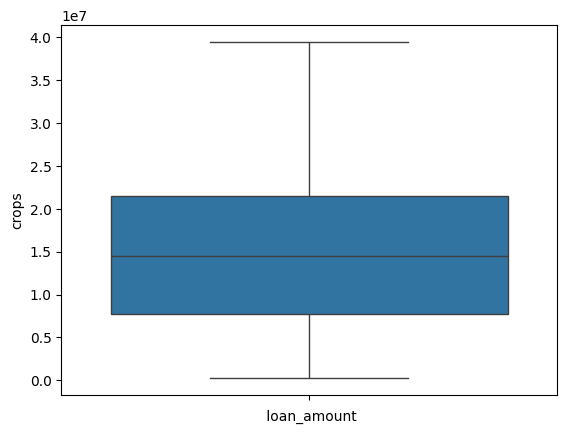

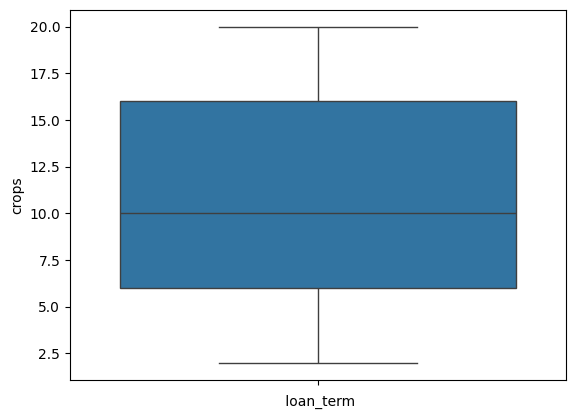

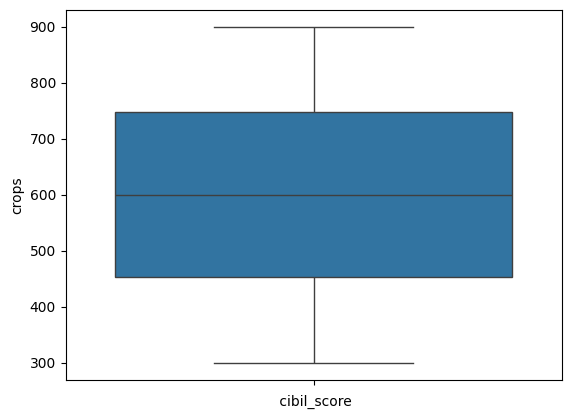

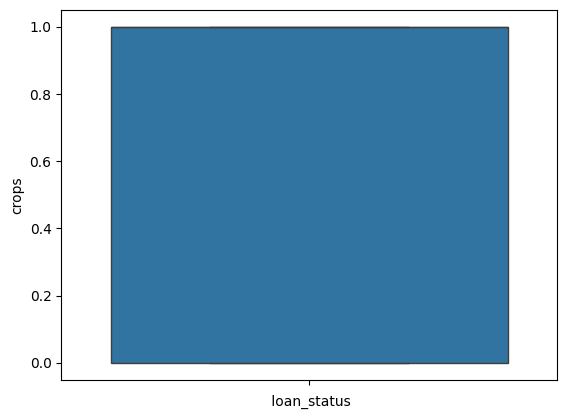

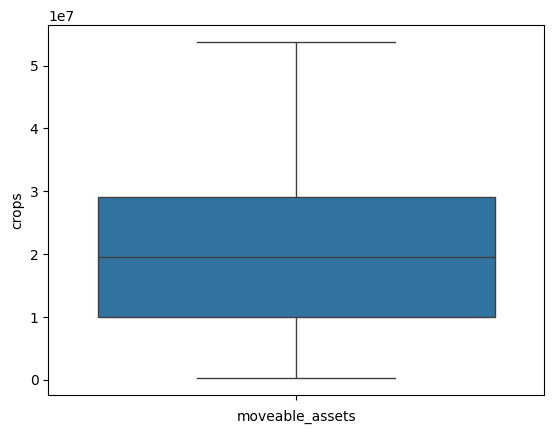

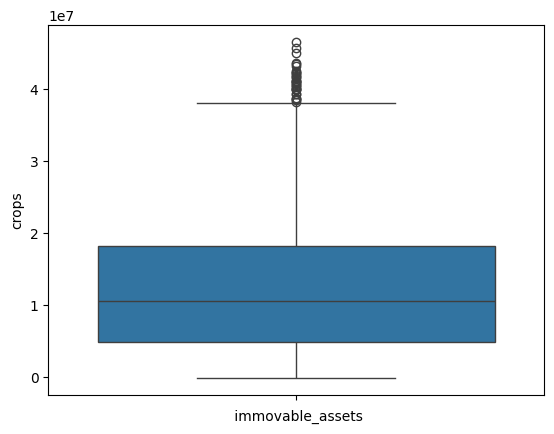

In [68]:
for i in num:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('crops')
    plt.show()

In [69]:
x = df.drop(columns=[' loan_status'],axis=1)
y=df[' loan_status']

In [70]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 1.51250774,  0.99736803, -1.01504731, ..., -1.02962329,
         0.24119703,  0.44135702],
       [-0.25599737,  0.99736803, -1.01504731, ..., -0.00733921,
         0.36736311,  0.19223814],
       [ 0.33350433,  0.99736803, -1.01504731, ..., -0.86117876,
         1.25893675,  0.86377599],
       ...,
       [ 1.51250774, -1.00263891,  0.98517575, ...,  0.5502703 ,
        -0.05319049,  0.45218828],
       [ 0.92300603, -1.00263891, -1.01504731, ..., -1.32004491,
        -1.07934127, -0.76091237],
       [-0.84549907, -1.00263891, -1.01504731, ..., -0.44878006,
        -0.72607625, -0.64176855]])

In [72]:
import ubml
metrics_performance,best_model=ubml.model_train_test(mode='classification',x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

In [73]:
print(best_model)
metrics_performance

Decision Tree Classifier


,accuracy score train,accuracy score test,f1 score train,f1 score test,recall score train,recall score test,jaccard score train,jaccard score test,precision score train,precision score test
Logistic Regression,0.793,0.802,0.845,0.853,0.909,0.914,0.732,0.744,0.789,0.799
KNN Classifier,0.711,0.582,0.784,0.693,0.848,0.752,0.645,0.530,0.730,0.643
SVM Classifier,0.621,0.628,0.766,0.771,1.000,1.000,0.621,0.628,0.621,0.628
Naive Bayes Classifier,0.667,0.674,0.787,0.793,0.992,0.993,0.649,0.657,0.653,0.660
Decision Tree Classifier,1.000,0.984,1.000,0.987,1.000,0.989,1.000,0.974,1.000,0.985
Random Forest Classifier,1.000,0.978,1.000,0.982,1.000,0.987,1.000,0.965,1.000,0.978


In [74]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [75]:
from sklearn.model_selection import cross_val_score
avg=cross_val_score(dt_classifier,x_train,y_train,cv=5)
np.average(avg)

0.9797950219619327

In [76]:
pred_dt = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9800936768149883

In [77]:
from sklearn.metrics import classification_report 
dt_report=classification_report(y_test,pred_dt)
print(dt_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
import joblib

joblib.dump(dt_classifier,'Loan_Model.pkl')
joblib.dump(scaler,'Scalar_model.pkl')

['Loan_Model.pkl']